# Basics of Web Crawling & Scraping / HTML & CSS / Static & Dynamic Crawling

## Basics

HTML : Hypertext Markup Language  
Web crawling : Getting all the contents of a certain webpage  
Web scraping : Selecting a certain part of a webpage and getting the information from that selected part  
Use Chrome - Easiest to crawl + F12 Developer tools / Ctrl+Shift+C  

### Packages

In [4]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [10]:
# requests package

import requests
url = 'https://www.google.com'
response = requests.get(url) # Get HTML information from url
print(response.status_code) # If correct, code : 200
html_text = response.text # the text of the HTML that we want

200


In [9]:
# Selenium, using ChromeDriver

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time # for page loading

driver = webdriver.Chrome('chromedriver.exe') # opens Chrome (independent driver)
driver.get('https://www.google.com') # goes to URL
time.sleep(3) # for page loading

search = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input') # search box
search.send_keys('Selenium web crawling') # sends the value to the search box
time.sleep(1)
search.send_keys(Keys.ENTER) # the enter key
print('Page successfully loaded!')

Page successfully loaded!


In [13]:
# BeautifulSoup4, parsing HTML

import requests
from bs4 import BeautifulSoup as bs

response = requests.get('https://www.google.com')
html = bs(response.text, 'html.parser') # returns a clean form of HTML
google_logo = html.find('img', {'id':'hplogo'})
google_logo

<img alt="Google" height="92" id="hplogo" src="/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png" style="padding:28px 0 14px" width="272"/>

## HTML & CSS

### HTML
#### 0. HTML Structure
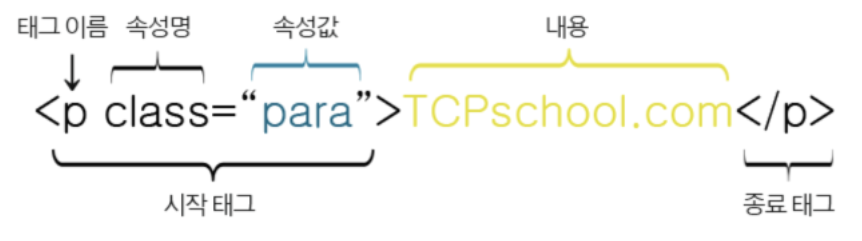
Tag encloses content

#### 1. Tag Names
|Tag|Description|
|---|---|
|h1 ~ h6|Title (h1 -> h6 in size)|
|p|Sentence|
|div|Box type section setting (blocks) -> tags inside div|
|span|Line type section setting (span always inside p)|
|img|Image tag (src : image url)|
|a|Hyperlinks|
|ul|Unordered list- List separated by icons (li : property of ul, as parts of the list)|
|ol|Ordered list (li : property of ol, as parts of the list)|

#### 2. Property names (id, class)
- id : unique property
    - `<tag_name id='property>`
- class : can be used many times to similar objects
    - `<tag_name class='property'>`

### CSS
#### 0. CSS Structure
CSS decorates HTML : colors, size, backgrounds etc.  
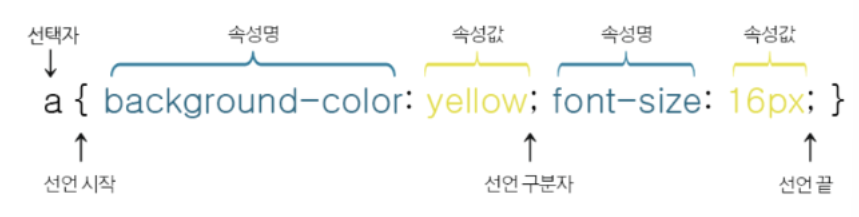  
Selector-Declaratives Structure

#### 1. Selectors
|Category|Description|Example|
|---|---|---|
|Tag selection|Select certain tag|div : `<div>` tag select|
|ID selection|Selects `id='property'` tag|#query : selects id that has property query|
|Class selection|Selects `class='property'` tag|.title : selects class that has property title|
|Tag+ID selection|Selects tag that has property for id among certain tags|input#query : among input tags, selects id that has property query|
|Tag+Class selection|Selects tag that has property for class among certain tags|p.title : among p tags, selects class that has property title|

#### 2. Using CSS selector
1. Access Chrome -> website
2. Developer tools (F12), get the HTML part needed
3. Right click on HTML, Copy-Copy Selector
4. Paste

#### 3. Codes
- Selenium : `driver.find_element(s)_by_` + `xpath(), id(), class_name(), tag_name()`
- BeautifulSoup : `find_all(), find()`

## Static & Dynamic Crawling

### Static & Dynamic webpages

#### 1. Static Webpage
- Static webpage : pre-saved webpage file saved on the web server
- Can access all the HTML information with just the URL
- ex. search result

#### 2. Dynamic Webpage
- Dynamic webpage : webpages that cannot be accessed only using URL
- Even if access is possible, the contents are added or modified real time
- ex. YouTube/Instagram scroll down, Map website

### Static & Dynamic Crawling

||Static Crawling|Dynamic Crawling|
|---|---|---|
|Package|`requests / urllib`|`selenium`|
|Coverage|Static webpage|Static&Dynamic webpage|
|Speed|Fast|Relatively slow|
|Parsing|`BeautifulSoup`|`BeautifulSoup, selenium`|

#### 1. Static Crawling
- Gets HTML from a static webpage using `requests` or `urllib` package
- Parsing using `BeautifulSoup`

#### 2. Dynamic Crawling
- Dynamic webpage -> `selenium` package's `chromedriver`
- Log-in, clicking are all possible
- `driver.find_element(s)` : get the wanted HTML part
- `driver.page_source` : entire HTML
- Relatively slow, as real time manipulation is incurring